## Исследование данных о российском кинопрокате



В данной работе мы изучаем рынок Российского проката. Исследуем успешность картин, получивших господдержку.
У нас есть две таблицы данных - регистрационные данные фильмов из прокатных удостоверений и сборы с проката этих фильмов в РФ. Заказчик - Министерство культуры РФ.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В обеих таблицах есть столбец puNumber, по которому я буду объединять эти таблицы, но у них разные типы. Посмотрю на содержимое столбцов в обеих таблицах и совершу преобразование типа в таблице df_movies, скорее всего, потому что по логике - это номер, а по типу в таблице df_shows можно делать вывод, что там не должно встречаться букв или каких-то знаков, только цифры.

In [4]:
print('puNumber в df_movies')
display(df_movies['puNumber'].sample(10))
print('puNumber в df_shows')
display(df_shows['puNumber'].sample(10))

puNumber в df_movies


2528    114002915
1560    121002714
3777    124000417
4832    221014711
6622    121031718
1734    111004313
4684    221122310
419     221012912
2443    111014015
1087    121033112
Name: puNumber, dtype: object

puNumber в df_shows


1403    121009619
1946    121020619
2066    121022717
888     114004316
112     111002215
81      111001517
1241    121006418
682     111018315
1328    121008215
2748    124002215
Name: puNumber, dtype: int64

Оказывется, в столбце df_movies['puNumber'] есть буквенное значение, из-за которого его нельзя привести к числовому типу.

In [5]:
df_movies[df_movies['puNumber'] == 'нет'].count()

title                    1
puNumber                 1
show_start_date          1
type                     1
film_studio              1
production_country       1
director                 1
producer                 1
age_restriction          1
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
dtype: int64

Да, моё предположение подтвердилось, переопределяю тип puNumber в df_movies.

In [6]:
df_movies.loc[df_movies['puNumber']== 'нет', 'puNumber'] = -1

In [7]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'])
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Теперь тип один у столбцов, поэтому начнём слияние.

In [8]:
df = df_movies.merge(df_shows, on='puNumber', how='left')
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3573,МУЛЬТ в кино. Выпуск № 41,114003716,2016-11-23T12:00:00.000Z,Анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,3640802.30
3203,Подлец,111004416,2016-02-18T12:00:00.000Z,Художественный,"ООО ""Киностудия ""КУРЬЕР""",Россия,М.Левитин мл.,"Г.Шадур, М.Левитин мл.",«16+» - для детей старше 16 лет,0.00,24986000.00,38440000.00,Министерство культуры,5.2,"комедия,драма",130053.00
494,Диктатор,121008012,2012-03-28T12:00:00.000Z,Художественный,Фо бай Ту Филмз,США,Ларри Чарльз,"Саша Барон Коэн, Алек Берг, Дэвид Мэндел",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,комедия,NaN
6033,Строгановы. Елена Последняя,112002918,2018-07-20T12:00:00.000Z,Документальный,"ООО ""ИВД Кино""",Россия,С.Майоров,Ю.Кузяева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,комедия,NaN
4166,Жизнь в военное время,121018910,2010-10-28T12:00:00.000Z,Художественный,Верк Верк Воркс,США,Тодд Солондз,"Кен Бейли, Эндрю Петерсон, Элизабет Редлиф, Ма...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"драма,комедия",NaN


Столбец добавлен. Сохранены ли все строки из df_movies?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Да, строки не потеряны.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [10]:
df.sample(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3746,Дуэль (2016),121006917,2017-04-11T12:00:00.000Z,Художественный,"Лайнсгейт Премьер, Атомик Интертейнмент, Мэндв...",США,Киран Дарси-Смит,"Тодд Либерман, Дэвид Хоберман",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"драма,биография,история",NaN
4768,И не было лучше брата,111000111,2011-01-13T12:00:00.000Z,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,детектив,NaN
2303,Обыкновенный человек,111018514,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,А.Столбов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,комедия,NaN
1823,Хочу как Бриджет,121023713,2013-09-10T12:00:00.000Z,Художественный,"Софика Ю Же Сэ 1, Франс 2 Синема, ТФ1 Друат Ау...",Франция,Аньес Обадья,Ромен Ройтман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"мелодрама,комедия",NaN
2681,Опасное погружение,121009815,2015-04-27T12:00:00.000Z,Художественный,Бигскоуп Филмз,Великобритания,Рон Скальпелло,"Лори Кук, Алан МакКена, Джейсон Ньюмарк",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.9,"триллер,драма",12466638.50
603,Лоракс /По одноименной книге доктора Сьюсса (Т...,224015912,2012-07-05T12:00:00.000Z,Анимационный,"Юниверсал Пикчерз, Иллюминейшн Интертейнмент",США,Крис Рено,"Кен Даурио, Кристофер Меледандри, Джанет Хили",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мультфильм,мюзикл,фэнтези",NaN
376,Серфинг на Таити 3D,226006312,2012-04-05T12:00:00.000Z,Документальный,Перфект Вэйв Продакшн Инк.,США,Стефан Лоу,Петро Л.Серапиглия,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,документальный,NaN
5123,Морская бригада,124001711,2011-10-17T12:00:00.000Z,Анимационный,"Сильвер Ант, Джазира Чилдренс Ченел",Малайзия,Аун Хое Го,Махмуд Орфали,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.3,мультфильм,58890.00
1079,Сафари 3D.,122000612,2012-06-19T12:00:00.000Z,Документальный,"3Д Сафари, Уалд Эйс Продакшнз, Диджитал Револю...",США,Дэвид Кин,Хантер Эллис,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"документальный,семейный",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19T12:00:00.000Z,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

    'title' - название фильма - object - не требует изменеий
    'puNumber' - номер прокатного удостоверения - int64 - может, int32?
    'show_start_date' - дата премьеры - object - хорошо бы datetime
    'type' - тип фильма - object - не требует изменеий
    'film_studio' - студия-производитель - object - не требует изменеий
    'production_country' - страна-производитель - object - не требует изменеий
    'director' - режиссер - object - не требует изменеий
    'producer' - продюсер - object - не требует изменеий
    'age_restriction' - возрастная категория - object - не требует изменеий
    'refundable_support' - объём возвратных средств господдержки - float64 - не требует изменеий
    'nonrefundable_support' - объём невозвратных средств господдержки - float64 - не требует изменеий
    'budget' - общий бюджет фильма - float64 - не требует изменеий
    'financing_source' - источник госфинансирования - object - не требует изменеий
    'ratings' - рейтинг на Кинопоиске - object - хорошо бы float
    'genres' - жанр фильма - object - не требует изменеий
    'box_office' - сборы в рублях - float64 - не требует изменеий





In [13]:
# преобразую в тип datetime и оставляю только дату, потому что по сэмплу видим время проката одинаковое
# и, по-видимому, не значащее
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d').dt.date
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')

In [14]:
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4493,Принцесса де Монпансье,121022410,2010-12-07,Художественный,"Парадиз Фильм, Студио Канал, Франс 2 Синема, Ф...",Франция - Германия,Бертран Тавернье,Эрик Хьюманн,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"драма,мелодрама,история",1240.00
4641,Затащи меня в ад,221154510,2010-12-17,Художественный,"Бакаро Интертейнмент, Хост Хауз ПИкчерз, Манда...",США,Сэм Рэйми,"Джошуа Донен, Джозеф Дрэйк, Грант Кертис",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,"ужасы,комедия,фэнтези",NaN
4769,Пропавший без вести.,111000211,2011-01-13,Художественный,"ООО "" Пролайн Фильм""",Россия,А.Фенченко,"А.Сигле, С.Ершов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,"драма,криминал,детектив",NaN
5829,Прощаться не будем,111003418,2018-06-21,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0.00,35000000.00,109814241.00,Министерство культуры,5.8,"военный,драма,история",5539973.15
7218,Музей Прадо: Коллекция чудес,126003819,2019-09-18,Документальный,"3D Продуциони, Нексо Диджитал","Италия, Испания",Валерия Паризи,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,1549242.52


In [15]:
df['ratings'] = df['ratings'].replace('%', '', regex=True)
df['ratings'] = df['ratings'].astype('float')
df['puNumber'] = df['puNumber'].astype('int32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int32         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [17]:
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4626,Сумерки. Сага. Затмение /По произведению Стефа...,221152710,2010-12-17,Художественный,"Саммит Интертейнмент, Темпл Хилл Интертейнмент...",США,Дэвид Слэйд,"Билл Баннерман, Марти Бауэн, Вик Годфри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"фэнтези,триллер,мелодрама",NaN
6719,МУЛЬТ в кино. Выпуск № 92,114001119,2019-03-02,Анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5700,Охота на воров,121001018,2018-02-08,Художественный,"Джи-Бейс, Релативити Медиа, Тули Такер Интерте...",США,Кристиан Гьюдгэст,"Джерард Батлер, Марк Кэнтон, Такер Тули",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"боевик,триллер,драма",72896300.44
495,Отряд особого назначения.,221065914,2014-10-07,Художественный,Студио Канал,Франция,Стефан Рибожад,Тьерри Марро,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,драма,военный",NaN
2888,"Маша и Медведь. Серия ""Эх, прокачу!""",124000416,2016-02-17,Анимационный,Анимаккорд Лтд,Республика Кипр,Владислав Байрамгулов,"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [18]:
print('Пропусков в таблице:')
df.isna().sum()

Пропусков в таблице:


title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Такие данные логически не восстановишь. Слишком персонифицированные.

In [19]:
df[df['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.00
6485,До и После,112014418,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Хоть в большинстве это Российские фильмы, я считаю эти пропуски полностью случайными.

In [20]:
df[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Предположу, что эти записи могли попасть из Российского реестра фильмов, если такой существует, а там может не указываться старна производства, если фильм выпущен в РФ, ведь реестр и так Российский. От значений других столбцов это не зависит, полностью случайная пропажа.

In [21]:
df[df['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Я думаю, что отсутствие режиссёра фильма тоже случайное событие. Однако, можно заметить, что рейтинг у большинства произведений "0+", это Россия или Великобритания в основном, половина из них 2010 года выпуска, но я не думаю, что тут есть связь.

In [22]:
# Выделим подборку строк с отсутствующими продюсерами

isna_prod = df[df['producer'].isna()]

# и отсутствующими жанрами

isna_genr = df[df['genres'].isna()]

In [23]:
isna_prod['type'].unique()

array(['Художественный', 'Документальный', 'Анимационный', 'Прочие',
       'Научно-популярный', ' Художественный'], dtype=object)

In [24]:
isna_genr['type'].unique()

array(['Художественный', 'Прочие', 'Документальный', 'Анимационный',
       'Научно-популярный', ' Художественный'], dtype=object)

In [25]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видно, что тип фильмов ни при чём. Посмотрим на разброс стран.

In [26]:
isna_prod['production_country'].unique()


array(['СССР', 'СССР, Венгрия', 'Чехословакия', 'США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия',
       'Франция - Италия - Великобритания - США', 'Чехия',
       'СССР, Финляндия', 'Великобритания - США', 'Япония',
       'СССР, Польша', 'СССР - Швейцария - Франция', 'Франция',
       'Великобритания', 'Австралия', 'Италия', 'Украина',
       'Франция-Бельгия', 'Мексика - Франция',
       'Великобритания - Германия', 'Россия', 'Иран',
       'Республика Узбекистан', 'Бразилия', 'Италия ', 'Франция - Россия',
       'Индонезия', 'СССР, ФРГ, Западный Берлин',
       'США - Канада - Афганистан - Бельгия - Франция',
       'США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция',
       'Бельгия - Испания - Канада - Нидерланды',
       'СССР, Венгрия, ЧССР, ГДР', 'СССР  ', 'СССР ', ' СССР ', 'СССР   ',
       ' СССР   ', 'СССР     ', 'Индия - Мексика', 'СССР    ', ' С

Отсутствие продюсера в фильмах СССР объясняется тем, что должность продюсера появилась в современной России, а в СССР её не было.
Что касается других стран - никакого объяснения.
То есть, пропуски для СССР не случайны, для остальных стран - случайны.

In [27]:
isna_genr['production_country'].unique()


array(['США', 'СССР', 'Чехия', 'Италия', 'Великобритания', 'Австралия',
       'США - Венгрия - Великобритания', 'Франция', 'Россия', 'Иран',
       'Япония', 'Франция - Бельгия - Люксембург', 'Норвегия',
       'Республика Узбекистан', 'Италия ', 'Киргизия', 'Индия', 'Австрия',
       'Республика Беларусь', 'Канада',
       'США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция',
       'Аргентина', 'США - Канада - Индонезия', 'Армения - Казахстан',
       'Бельгия - Испания - Канада - Нидерланды',
       'Мексика - Эквадор - Канада - США - Франция - Малайзия - Италия - Аргентина - Германия - Индия  ',
       'США - Нидерланды - Бельгия - Венгрия - Греция - Канада',
       'Норвегия - Азербайджан - Россия - Колумбия - Великобритания - Венгрия - Румыния - Франция - Грузия',
       'Нидерланды - США - Германия - Канада - Франция - Ирландия - Великобритания',
       'Германия', 'Испания',
       'Франция - США - Великобритания - Колумбия - Бельгия - Россия',
       'Россия

Отсутствие жанра по странам - без связи.

<AxesSubplot:xlabel='age_restriction'>

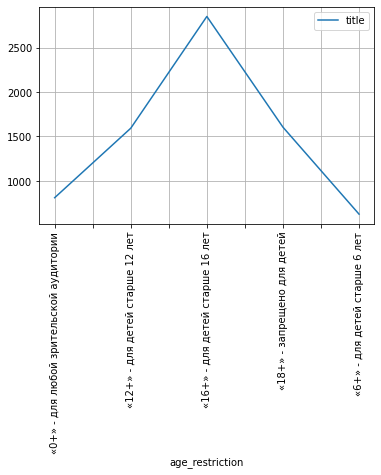

In [28]:
pd.pivot_table(df, index = 'age_restriction', values= 'title', aggfunc = 'count').plot(rot=90, grid=True)

<AxesSubplot:xlabel='age_restriction'>

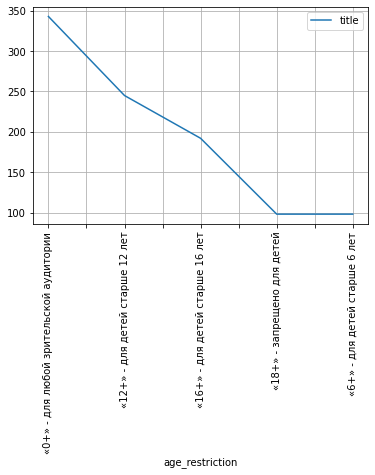

In [29]:
pd.pivot_table(isna_genr, index = 'age_restriction', values= 'title', aggfunc = 'count').plot(rot=90, grid=True)

Как будто сложнее определять жанр произведения, если оно для более младшего зрителя. Можно было бы посчитать эти пропуски среди жанров не полностью случайными.

<AxesSubplot:xlabel='age_restriction'>

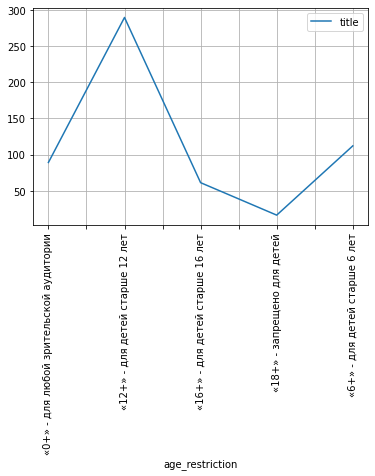

In [30]:
pd.pivot_table(isna_prod, index = 'age_restriction', values= 'title', aggfunc = 'count').plot(rot=90, grid=True)

Почему фильмы "12+" чаще не содержат продюсера? Скорее всего, дело в фильмах СССР, которые более мягкие, чем фильмы более позднего времени. И большим фильмам СССР можно присвоить более низкий возрастной ценз. 

In [31]:
isna_rate = df[df['ratings'].isna()]

<AxesSubplot:xlabel='age_restriction'>

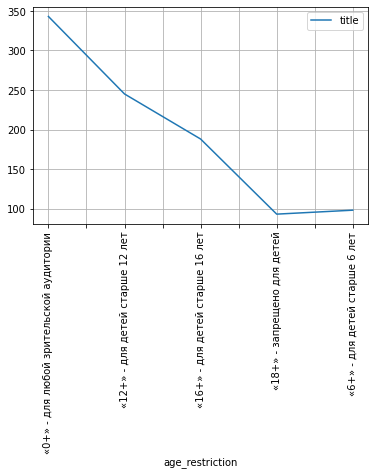

In [32]:
pd.pivot_table(isna_rate, index = 'age_restriction', values= 'title', aggfunc = 'count').plot(rot=90, grid=True)

In [33]:
isna_rate['genres'].unique()

array([nan], dtype=object)

In [34]:
isna_rate['production_country'].unique()

array(['США', 'СССР', 'Чехия', 'Италия', 'Великобритания', 'Австралия',
       'США - Венгрия - Великобритания', 'Франция', 'Россия', 'Иран',
       'Япония', 'Франция - Бельгия - Люксембург', 'Норвегия',
       'Республика Узбекистан', 'Италия ', 'Киргизия', 'Индия', 'Австрия',
       'Республика Беларусь', 'Канада',
       'США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция',
       'Аргентина', 'США - Канада - Индонезия', 'Армения - Казахстан',
       'Бельгия - Испания - Канада - Нидерланды',
       'Мексика - Эквадор - Канада - США - Франция - Малайзия - Италия - Аргентина - Германия - Индия  ',
       'США - Нидерланды - Бельгия - Венгрия - Греция - Канада',
       'Норвегия - Азербайджан - Россия - Колумбия - Великобритания - Венгрия - Румыния - Франция - Грузия',
       'Германия', 'Испания',
       'Франция - США - Великобритания - Колумбия - Бельгия - Россия',
       'Россия - Республика Кипр',
       'Япония - Великобритания - Швейцария - Ирландия - Дания -

In [35]:
isna_rate['type'].unique()

array(['Художественный', 'Прочие', 'Документальный', 'Анимационный',
       'Научно-популярный', ' Художественный'], dtype=object)

Ситуация с рейтингом похожа на пропуски жанров. Возможно, они отсутствуют по той же причине. Страна производства и тип фильма не показывают особенностей.

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154

Эти пропуски не случайны. Мы рассматриваем эти данные только для фильмов, финансировавшихся из бюджета РФ.


Общий вывод: Пропуски в финансовом разделе не случайны. Жанры, рейтинги больше отсутствуют в категориях детских и подростковых фильмов, отсутствие продюсера для фильмов времён СССР - закономерно и не случайно.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [36]:
df.duplicated().sum()

0

In [37]:
df['title'].duplicated().sum()

714

В правилах выдачи прокатных удостоверений говорится, что возможна выдача нескольких, если их запрашивают разные прокатчики. Поэтому, я думаю, не старшно, что названия дблируются - номера у них разные. В этом мы сейчас убедимся.


[Ссылка на Консультант-Плюс (большой документ)](http://www.consultant.ru/cons/cgi/online.cgi?req=doc&base=LAW&n=209560&rnd=290511.2178523226&dst=100009&fld=134#0)

In [38]:
numbers = df['puNumber']

In [39]:
numbers.duplicated().sum()

2

Только два номера прокатных удостоверений имеют дубли в базе.

In [40]:
numbers[numbers.duplicated()]

4639    221154310
5068    221054410
Name: puNumber, dtype: int32

Посмотрим, что продублировано.

In [41]:
df.loc[df['puNumber']==221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


Это разные фильмы.

In [42]:
df.loc[df['puNumber']==221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


И это разные фильмы.

In [43]:
titles = df.loc[df['puNumber'].isin(numbers[numbers.duplicated()])]['title']

In [44]:
df.loc[df['title'].isin(titles)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4050,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
4513,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
4520,Как жениться и остаться холостым,221142510,2010-12-03,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4553,Анализируй это!,221147310,2010-12-15,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Я бы удалиа строки 5067, 4638, 4639 при необходимости. Тогда "Анализируй то!" и "это!" останутся хотя бы в одном экземпляре. А два другие фильма есть в более, чем одном экземпляре. А вообще, я не знаю, что могло пойти не так с удостоверениями и на всякий случай удалила бы все четыре строки с неправильными номерами. На фоне 7000+ фильмов это не страшно.



#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [45]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В типе фильма видим значения с пробелом впереди слов.

In [46]:
df['type'] = df['type'].str.strip()

In [47]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [48]:
df.duplicated().sum()

0

Это не породило дублей, хорошо.

In [49]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Здесь и далее - встречаются совокупности значений, а не отдельные - это 'producer', 'film_studio', 'genres', 'financing_source'. Может быть, такое есть и в 'director', из примера не видно, но два человека в этой колонке есть - встречала в сэмплах.

In [50]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [51]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [52]:
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [53]:
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [54]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [55]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [56]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [57]:
df['box_office'].unique()

array([           nan, 2.70000000e+03, 3.60000000e+02, ...,
       3.14379050e+06, 1.80017724e+07, 2.19569000e+05])

In [58]:
df['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

Здесь мы видим будто два типа значений - рейтинг в пределах 10 и процентный.

In [59]:
df[df['ratings']>10].count()

title                    29
puNumber                 29
show_start_date          29
type                     29
film_studio              29
production_country       29
director                 29
producer                 29
age_restriction          29
refundable_support        2
nonrefundable_support     2
budget                    2
financing_source          2
ratings                  29
genres                   26
box_office               15
dtype: int64

Если понадобится, можно выделить эту группу и делать анализ отдельно по ним.

In [60]:
df['budget'].sort_values().unique()

array([0.00000000e+00, 1.44624640e+07, 1.50100000e+07, 1.81664180e+07,
       1.87060800e+07, 2.70000000e+07, 2.81155800e+07, 2.85714290e+07,
       3.00000000e+07, 3.04489110e+07, 3.08000000e+07, 3.13053130e+07,
       3.30000000e+07, 3.50000000e+07, 3.52969500e+07, 3.57142860e+07,
       3.57600600e+07, 3.60162690e+07, 3.62595000e+07, 3.70009900e+07,
       3.71428570e+07, 3.73712620e+07, 3.74247960e+07, 3.75000000e+07,
       3.76000000e+07, 3.77442800e+07, 3.77656540e+07, 3.78491030e+07,
       3.78787870e+07, 3.78891650e+07, 3.79436520e+07, 3.80000000e+07,
       3.84400000e+07, 3.84615380e+07, 3.84667000e+07, 3.84768690e+07,
       3.85000000e+07, 3.88582600e+07, 3.90000000e+07, 3.90579710e+07,
       3.91292890e+07, 3.97000000e+07, 3.99900000e+07, 4.00000000e+07,
       4.00151220e+07, 4.02650000e+07, 4.02877700e+07, 4.05000000e+07,
       4.05741400e+07, 4.06008000e+07, 4.10000000e+07, 4.14978600e+07,
       4.19989840e+07, 4.20000000e+07, 4.22525090e+07, 4.28600000e+07,
      

In [61]:
df['nonrefundable_support'].sort_values().unique()

array([0.00000000e+00, 3.00000000e+06, 4.70000000e+06, 5.00000000e+06,
       5.30000000e+06, 6.00000000e+06, 8.00000000e+06, 1.00000000e+07,
       1.15200000e+07, 1.50000000e+07, 2.00000000e+07, 2.01452850e+07,
       2.17000000e+07, 2.29040000e+07, 2.30000000e+07, 2.40000000e+07,
       2.44500000e+07, 2.45000000e+07, 2.49860000e+07, 2.50000000e+07,
       2.52000000e+07, 2.53450000e+07, 2.55000000e+07, 2.59000000e+07,
       2.60000000e+07, 2.65000000e+07, 2.69500000e+07, 2.70000000e+07,
       2.75000000e+07, 2.75100000e+07, 2.80000000e+07, 2.85000000e+07,
       2.90000000e+07, 3.00000000e+07, 3.01239150e+07, 3.10000000e+07,
       3.40000000e+07, 3.50000000e+07, 3.70000000e+07, 4.00000000e+07,
       4.15000000e+07, 4.50000000e+07, 4.65022990e+07, 5.00000000e+07,
       5.00008660e+07, 5.10000000e+07, 5.50000000e+07, 5.65790550e+07,
       5.90000000e+07, 6.00000000e+07, 6.40000000e+07, 7.00000000e+07,
       7.50000000e+07, 8.00000000e+07, 8.50000000e+07, 9.00000000e+07,
      

In [62]:
df['refundable_support'].sort_values().unique()

array([0.000000e+00, 3.500000e+06, 5.000000e+06, 7.000000e+06,
       7.153119e+06, 7.346881e+06, 8.000000e+06, 9.000000e+06,
       1.000000e+07, 1.500000e+07, 1.700000e+07, 1.900000e+07,
       2.000000e+07, 2.500000e+07, 2.600000e+07, 2.800000e+07,
       2.900000e+07, 3.000000e+07, 3.500000e+07, 3.600000e+07,
       3.800000e+07, 4.000000e+07, 4.100000e+07, 4.400000e+07,
       5.000000e+07, 5.500000e+07, 6.000000e+07, 7.500000e+07,
       8.000000e+07, 1.000000e+08, 1.100000e+08, 1.150000e+08,
       1.500000e+08, 1.800000e+08,          nan])

Визуально ничего особенного. Попробуем сложить 'refundable_support' и 'nonrefundable_support' и сравнить с 'budget'

In [63]:
df[df['budget']<df['refundable_support']+df['nonrefundable_support']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


In [64]:
df[df['budget']==0].count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
dtype: int64

Я думаю, при необходимости, удалим просто эти значения. Возможно, его можно заменить хотя бы суммой возвратных и невозвратных средств.

In [65]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7486.00,332.00,332.00,332.00,6519.00,3158.00
mean,135178527.64,11864457.83,48980988.89,127229716.68,6.83,76478696.16
std,38382177.41,24916555.26,59980117.92,188588333.12,5.48,240353122.82
min,-1.00,0.00,0.00,0.00,1.00,0.00
25%,112025043.00,0.00,25000000.00,42000000.00,5.90,86239.00
50%,121015464.50,0.00,30000000.00,68649916.00,6.60,2327987.55
75%,124003313.75,15000000.00,40375000.00,141985319.50,7.20,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,99.00,3073568690.79


puNumber = -1 - это 'нет'.

In [66]:
df = df[df['puNumber']>0]

<AxesSubplot:>

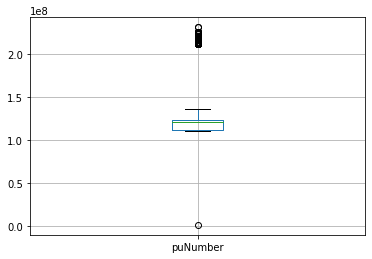

In [67]:
df.boxplot(column='puNumber')

In [68]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7485.00,332.00,332.00,332.00,6519.00,3158.00
mean,135196587.56,11864457.83,48980988.89,127229716.68,6.83,76478696.16
std,38352919.34,24916555.26,59980117.92,188588333.12,5.48,240353122.82
min,1811096.00,0.00,0.00,0.00,1.00,0.00
25%,112025118.00,0.00,25000000.00,42000000.00,5.90,86239.00
50%,121015510.00,0.00,30000000.00,68649916.00,6.60,2327987.55
75%,124003314.00,15000000.00,40375000.00,141985319.50,7.20,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,99.00,3073568690.79


<AxesSubplot:>

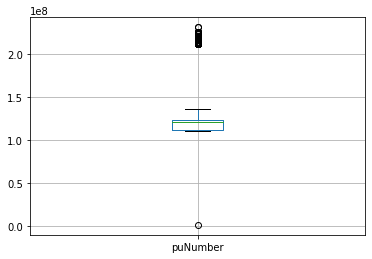

In [69]:
df.boxplot(column='puNumber')

Часть значений выбивается из межквартильного размаха. Я думаю, это не важно. Нумерация - это иногда странное дело.


Возвратные средства:

<AxesSubplot:>

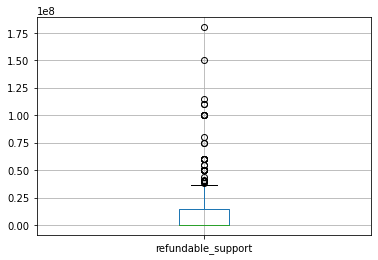

In [70]:
df.boxplot(column='refundable_support')

В основном в этом столбце нули. Рассмотрим значения, которые отличаются от нуля.

<AxesSubplot:>

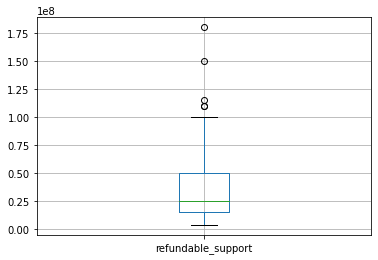

In [71]:
df[df['refundable_support']>0].boxplot(column='refundable_support')

In [72]:
df[df['refundable_support']>0]['refundable_support'].describe()

count         111.00
mean     35486486.49
std      31972875.36
min       3500000.00
25%      15000000.00
50%      25000000.00
75%      50000000.00
max     180000000.00
Name: refundable_support, dtype: float64

Суммы поддержки, которые надо вернуть, выделяются разные - от 3,5 миллионов рублей до 180 миллионов. Суммы свыше 100 млн рублей не характерны для финансирования и являются исключительными. Наличие проектов с такимбольшим финансированием смещает среднее в большую сторону от медианы.


Невозвратные средства:

<AxesSubplot:>

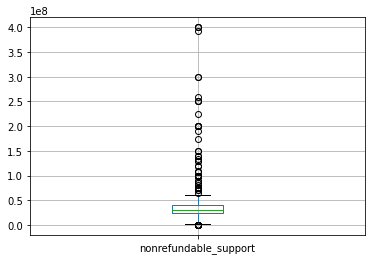

In [73]:
df.boxplot(column='nonrefundable_support')

In [74]:
df['nonrefundable_support'].describe()

count         332.00
mean     48980988.89
std      59980117.92
min             0.00
25%      25000000.00
50%      30000000.00
75%      40375000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

In [75]:
df[df['nonrefundable_support']<1].count()

title                    9
puNumber                 9
show_start_date          9
type                     9
film_studio              9
production_country       9
director                 9
producer                 9
age_restriction          9
refundable_support       9
nonrefundable_support    9
budget                   9
financing_source         9
ratings                  9
genres                   9
box_office               9
dtype: int64

Если убрать нули, посмотрим, что будет.

In [76]:
df[df['nonrefundable_support']>0]['nonrefundable_support'].describe()

count         323.00
mean     50345784.25
std      60243206.31
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      45000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

<AxesSubplot:>

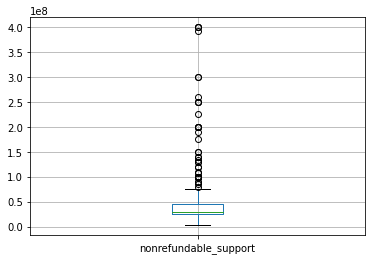

In [77]:
df[df['nonrefundable_support']>0].boxplot(column='nonrefundable_support')

Без нулей видим, что суммы финансирования также начинаются от 3 миллионов, но заканчиваются уже 400 миллионами. При этом получается, что наличие не частых сумм свыше 75-80 миллионов создают большой промежуток между средним и медианным значением невозвратного финансирования.

Общий бюджет:
Помним, что там есть нули. Сразу уберём их из рассмотрения.

In [78]:
df[df['budget']>0]['budget'].describe()

count          315.00
mean     134096082.35
std      191226039.63
min       14462464.00
25%       46153866.50
50%       73379554.00
75%      150004286.50
max     2305074303.00
Name: budget, dtype: float64

Получаем разброс финансирования от 14 миллионов до 2 миллиардов 300 миллионов.

<AxesSubplot:>

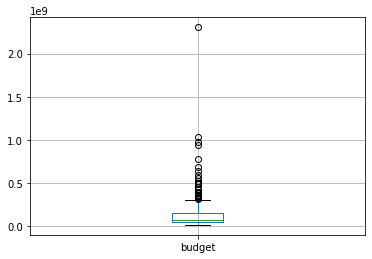

In [79]:
df[df['budget']>0].boxplot(column='budget')

Эти дваа с лишним миллиарда - исключительное дело. Посмотрим, что будет без этого проекта.

In [80]:
df[(df['budget']>0) & (df['budget']<10**9)]['budget'].describe()

count         313.00
mean    124288452.65
std     137875943.81
min      14462464.00
25%      46153846.00
50%      71517631.00
75%     150000000.00
max     980000000.00
Name: budget, dtype: float64

<AxesSubplot:>

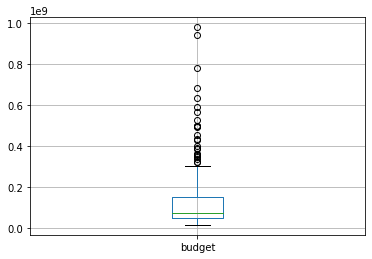

In [81]:
df[(df['budget']>0) & (df['budget']<10**9)].boxplot(column='budget')

Как и в других случаях, нечастые большие суммы отклоняют среднее от медианы.

Самые дорогие американские фильмы имеют бюджеты в десять раз больше, чем самая большая сумма в этом датасете. 

In [82]:
df[df['budget'] == df['budget'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59


Международный проект с небольшим российским финансированием.

<a id='разбор_box_office'>Сборы:</a>



In [83]:
df['box_office'].describe()

count         3158.00
mean      76478696.16
std      240353122.82
min              0.00
25%          86239.00
50%        2327987.55
75%       23979671.02
max     3073568690.79
Name: box_office, dtype: float64

In [84]:
df[df['box_office']>0]['box_office'].describe()

count         3134.00
mean      77064365.82
std      241178383.77
min             40.00
25%         101028.75
50%        2409099.35
75%       24569794.87
max     3073568690.79
Name: box_office, dtype: float64

Без нулей наблюдаем странное минимальное значение.

<AxesSubplot:>

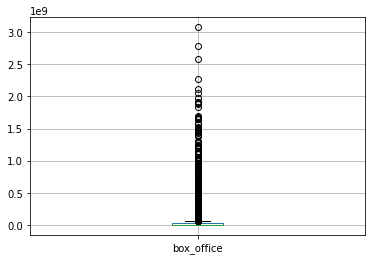

In [85]:
df[df['box_office']>0].boxplot(column='box_office')

In [86]:
df[(df['box_office']>0) & (df['box_office']<100000)]['box_office'].describe()

count     782.00
mean    15181.38
std     23295.38
min        40.00
25%       883.75
50%      3781.00
75%     17604.00
max     98265.00
Name: box_office, dtype: float64

782 значения для сборов меньше 100000 рублей. Мелкие кинотеатры? Онлайн-кинотеатры тому причиной? Они могут позволить себе и за сорок рублей продать просмотр. А ещё есть такая вещь, как инфляция, она тоже может влиять на размеры сборов - незаметно от года к году цены растут, а если взглянуть на большие промежутки времени, то мы увидим, что за последние десять лет она составила не менее сорока процентов. Часть роста, думаю, она может объяснить во всех финансовых столбцах, но причина в наличии некоторых величин лежит где-то в другом месте.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [87]:
df['show_start_year'] = pd.DatetimeIndex(df['show_start_date']).year

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [89]:
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
4033,Образ жизни.,212036310,2010-09-13,Художественный,"ООО ""МЕДфильм""",Россия,В.Кущинский,В.Коханович,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.20,комедия,NaN,2010
4525,Легенды ночных стражей /По мотивам произведени...,224026410,2010-12-10,Анимационный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз",США - Австралия,Зак Снайдер,Зарех Налбандьян,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.50,"мультфильм,фэнтези,боевик",400.00,2010
23,Неизвестные страницы из жизни разведчика,111003416,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,В.Чеботарев,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.30,"драма,военный",NaN,2016
1118,Дом с паранормальными явлениями,121032512,2012-12-27,Художественный,"Айм Глобал, Уайн Брозерс Интертейнмент",США,Майкл Тиддес,"Рик Альварез, Лиза Блум, Марлон Уайанс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.60,"ужасы,комедия",NaN,2012
3845,История одного вампира,221006410,2010-02-10,Художественный,"Юниверсал Пикчерз, Рилейтивити Медиа, Доннерс ...",США,Пол Вайц,"Лорен Шультер Доннер, Эван Лесли",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"фэнтези,боевик,триллер",NaN,2010


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [90]:
# функция для выделения первого значения до запятой в строках с перечислениями

def func_main_word(col):
    return_this = []
    for string in col:
        try:
            string = string.split(',')
            return_this.append(string[0])
        except:
            return_this.append(string)
    return return_this

In [91]:
# Выделяем главного режиссёра
df['main_director'] = func_main_word(df['director'])



In [92]:
# выделяем основной жанр
df['main_genre'] = func_main_word(df['genres'])

In [93]:
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
5886,Хот-Дог,121010418,2018-06-14,Художественный,"Панталеон Филмз, Уорнер Бразерс Продакшн, Баэф...",Германия,Торстен Кюнстлер,"Марко Бекманн, Дан Мааг, Матиас Швайгхёфер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.60,"боевик,комедия",1796963.50,2018,Торстен Кюнстлер,боевик
4770,Хаббл 3D.,122000111,2011-01-17,Документальный,"Аймакс Корпорейшн, Уорнер Бразерс",США,Тони Майерс,Тони Майерс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.60,документальный,NaN,2011,Тони Майерс,документальный
449,Схватка _.,221019512,2012-02-27,Художественный,"Лиддел Интертейнмент, Скотт Фри Продакшнз, 198...",США,Джо Карнахан,"Джо Карнахан, Ридли Скотт, Тони Скотт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.00,"триллер,драма,криминал",NaN,2012,Джо Карнахан,триллер
586,Смерть супергероя /По роману Энтони МакКартена/,121007612,2012-03-29,Художественный,"Бавариа Пикчерз, Синемендо, Гранд Пикчерз, Пик...",Германия,Йен Фитцгиббон,"Майкл Гарлэнд, Астрид Камке, Филипп Кройцер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,"драма,мультфильм",NaN,2012,Йен Фитцгиббон,драма
6418,Счастливый Лазарь,121026218,2018-12-03,Художественный,"Темпеста, Амка Филмз Продакшнз",Италия-Швейцария-Франция-Германия,Аличе Рорвахер,Карло Кресто-Дина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,"фэнтези,драма",1769136.50,2018,Аличе Рорвахер,фэнтези


In [94]:
# Обратим внимание на число записей в новых столбцах и тех, из которых их получили. Должно совпасть.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [95]:
try:
    df['fin_support_buget_part'] = (df['refundable_support'] + df['nonrefundable_support'])/df['budget']
except:
    print(0)

In [96]:
df['fin_support_buget_part'].describe()

count   332.00
mean       inf
std        NaN
min       0.04
25%       0.38
50%       0.61
75%       0.66
max        inf
Name: fin_support_buget_part, dtype: float64

In [97]:
df['fin_support_buget_part'] = df['fin_support_buget_part'].replace(float('inf'), np.nan)

In [98]:
df['fin_support_buget_part'].describe()

count   315.00
mean      0.52
std       0.17
min       0.04
25%       0.37
50%       0.59
75%       0.66
max       0.78
Name: fin_support_buget_part, dtype: float64

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [99]:
print('Фильмов выходило за год:')
df.groupby('show_start_year')['title'].count()

Фильмов выходило за год:


show_start_year
2010    985
2011    622
2012    593
2013    630
2014    806
2015    705
2016    818
2017    505
2018    891
2019    930
Name: title, dtype: int64

In [100]:
# Выделим только те строки, где есть сумма проката, говорящая об осуществившемся прокате фильма и заработанных на этом деньгах.
df_rent = df[df['box_office'] > 0]


In [101]:
# Посмотрим, сколько фильмов выходило в прокат каждый год.
rent_films = df_rent.groupby('show_start_year')['title'].count()


In [102]:
# Посмотрим, сколько фильмов есть в таблице за каждый год.
all_films = df.groupby('show_start_year')['title'].count()

Процент фильмов с известной информацией о прокате за год:


show_start_year
2010   10.25
2011   17.52
2012   20.74
2013   28.41
2014   33.87
2015   65.53
2016   64.18
2017   70.69
2018   53.31
2019   56.99
Name: title, dtype: float64

<AxesSubplot:xlabel='show_start_year'>

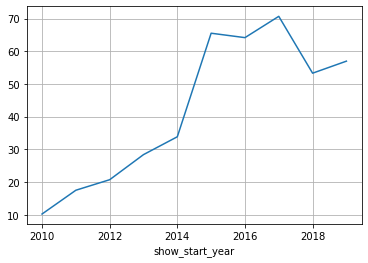

In [103]:
print('Процент фильмов с известной информацией о прокате за год:')
prcent = 100*rent_films/all_films
display(prcent)
prcent.plot(grid=True)

По крайней мере с 2015 года есть информация по более, чем половине фильмов из таблицы.

In [104]:
print(f'Доля фильмов с указанной информацией о прокате в кинотеатрах на весь объём данных: {df_rent["title"].nunique()/df["title"].nunique():.2%}' )

Доля фильмов с указанной информацией о прокате в кинотеатрах на весь объём данных: 45.84%


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [105]:
df_rent.groupby('show_start_year')['box_office'].sum().sort_values()

show_start_year
2010       2428654.00
2012       6955423.00
2011      14102765.00
2013      29799706.20
2014    7444951859.20
2015   39497365196.40
2016   47866299741.91
2019   48425708779.59
2017   48563707217.51
2018   49668403134.32
Name: box_office, dtype: float64

<AxesSubplot:xlabel='show_start_year'>

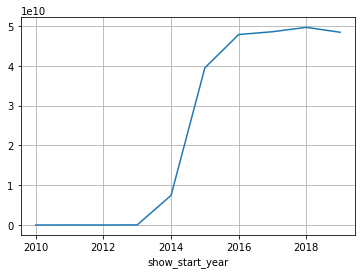

In [106]:
df_rent.groupby('show_start_year')['box_office'].sum().plot(y='box_office', grid=True, x='show_start_year')

Видим, что сумма сборов была минимальной в 2010 году, а максимальная - в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [107]:
pd.pivot_table(df_rent, index='show_start_year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
show_start_year,,
2010,24046.08,1710.00
2011,129383.17,3000.00
2012,56548.15,6220.00
2013,166478.81,3580.00
2014,27270885.93,20400.00
2015,85492132.46,5003450.15
2016,91173904.27,3915041.02
2017,136032793.33,9968340.00


Среднее значение сильно отличается от медианного в случае наличия больших и редких значений, утягивающих среднее вверх от медианы. Или множественных небольших значений, что больше похоже на наш случай, если вспомнить [разбор этого столбца выше](#разбор_box_office).

In [108]:
pd.pivot_table(df_rent, index='show_start_year', values='box_office', aggfunc=['mean', 'median', 'min', 'max'])

,mean,median,min,max
,box_office,box_office,box_office,box_office
show_start_year,,,,
2010,24046.08,1710.00,75.00,1446400.00
2011,129383.17,3000.00,125.00,11618085.00
2012,56548.15,6220.00,80.00,2311220.00
2013,166478.81,3580.00,40.00,19957031.50
2014,27270885.93,20400.00,50.00,1016410635.30
2015,85492132.46,5003450.15,100.00,1658861425.50
2016,91173904.27,3915041.02,200.00,2048126108.00
2017,136032793.33,9968340.00,7900.00,2779686144.00


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [109]:
pd.pivot_table(df_rent[df_rent['show_start_year']>2014], index=['show_start_year', 'age_restriction'] , values='box_office', aggfunc='sum')

box_office
show_start_year age_restriction                                      
2015            «0+» - для любой зрительской аудитории   379054578.37
                «12+» - для детей старше 12 лет        13616082008.91
                «16+» - для детей старше 16 лет        11368120870.27
                «18+» - запрещено для детей             5432308367.44
                «6+» - для детей старше 6 лет           8701799371.41
2016            «0+» - для любой зрительской аудитории   150228848.67
                «12+» - для детей старше 12 лет        12204446524.39
                «16+» - для детей старше 16 лет        16664548541.74
                «18+» - запрещено для детей             6793929818.87
                «6+» - для детей старше 6 лет          12053146008.24
2017            «0+» - для любой зрительской аудитории   229598930.00
                «12+» - для детей старше 12 лет         7851427660.67
                «16+» - для детей старше 16 лет        18745042900.06
                «18+» - запрещено для детей             9651495581.02
                «6+» - для детей старше 6 лет          12086142145.76
2018            «0+» - для любой зрительской аудитории    32449002.11
                «12+» - для детей старше 12 лет        14267291660.69
                «16+» - для детей старше 16 лет        16503602346.96
                «18+» - запрещено для детей             8760085501.15
                «6+» - для детей старше 6 лет          10104974623.41
2019            «0+» - для любой зрительской аудитории    17746066.82
                «12+» - для детей старше 12 лет        12680198773.67
                «16+» - для детей старше 16 лет        12753418984.60
                «18+» - запрещено для детей            10121796303.64
                «6+» - для детей старше 6 лет          12852548650.86

In [110]:
df_rent[df_rent['show_start_year']>2014].pivot_table(
    index='show_start_year',
    columns = 'age_restriction',
    values = 'box_office',
    aggfunc = 'sum')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41
2019,17746066.82,12680198773.67,12753418984.60,10121796303.64,12852548650.86


<AxesSubplot:xlabel='show_start_year'>

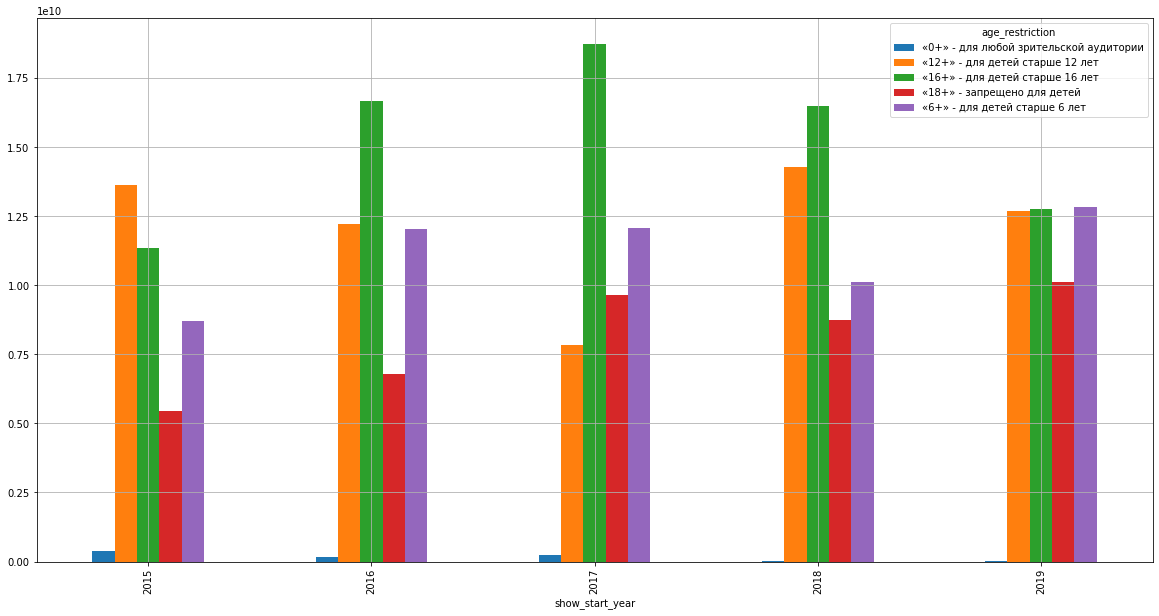

In [111]:
df_rent[df_rent['show_start_year']>2014].pivot_table(
    index='show_start_year',
    columns = 'age_restriction',
    values = 'box_office',
    aggfunc = 'sum').plot(kind='bar', figsize=(20,10), grid=True)

In [112]:
ages = [2015, 2016, 2017, 2018, 2019]

for i in range(len(ages)):
    the_year = pd.pivot_table(df_rent[df_rent['show_start_year']==ages[i]], index='age_restriction' , values='box_office', aggfunc='sum')
    max_money = the_year['box_office'].max()
    restr = the_year.loc[the_year['box_office'] == max_money].index[0]
    print(f'Максимум сборов в {ages[i]} году сделали фильмы категории {restr}.')
#    the_year.plot(kind='line',rot=90, label=f'Данные за {ages[i]} год', grid=True, legend=True)
    print()

Максимум сборов в 2015 году сделали фильмы категории «12+» - для детей старше 12 лет.

Максимум сборов в 2016 году сделали фильмы категории «16+» - для детей старше 16 лет.

Максимум сборов в 2017 году сделали фильмы категории «16+» - для детей старше 16 лет.

Максимум сборов в 2018 году сделали фильмы категории «16+» - для детей старше 16 лет.

Максимум сборов в 2019 году сделали фильмы категории «6+» - для детей старше 6 лет.



Подростки больше всех ходят в кинотеатры, но в 2019 году успех обрели картины для более юной аудитории.

<AxesSubplot:xlabel='show_start_year'>

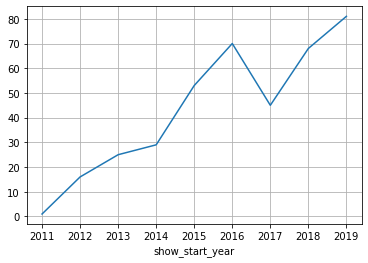

In [113]:
df_rent[df_rent['age_restriction']=='«6+» - для детей старше 6 лет'].groupby('show_start_year')['title'].count().plot(grid=True)

<AxesSubplot:xlabel='show_start_year'>

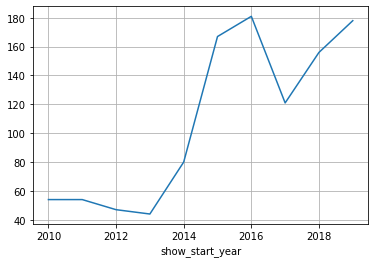

In [114]:
df_rent[df_rent['age_restriction']=='«16+» - для детей старше 16 лет'].groupby('show_start_year')['title'].count().plot(grid=True)

<AxesSubplot:xlabel='show_start_year'>

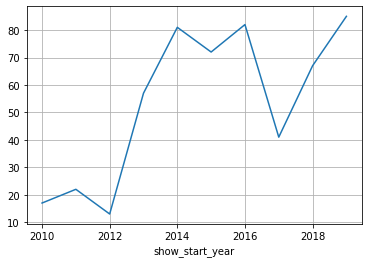

In [115]:
df_rent[df_rent['age_restriction']=='«12+» - для детей старше 12 лет'].groupby('show_start_year')['title'].count().plot(grid=True)

Количество меняется похоже (2015-2019), нельзя сказать, что каких-то картин приросло больше, чем других, и поэтому увеличился интерес. 

Стоимоть билетов на детские мультики выросла, поэтому увеличились сборы? Больше людей стало ходить с детьми на мультики в кинотеатры? Более интересные истории выходили в 2019 году? Более понятные сюжеты у мультиков, поэтому на них лучше идут?

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [116]:
df_gos_podd = df.dropna(subset=['financing_source']).copy()

In [117]:
df_gos_podd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   332 non-null    object        
 1   puNumber                332 non-null    int32         
 2   show_start_date         332 non-null    datetime64[ns]
 3   type                    332 non-null    object        
 4   film_studio             332 non-null    object        
 5   production_country      332 non-null    object        
 6   director                332 non-null    object        
 7   producer                330 non-null    object        
 8   age_restriction         332 non-null    object        
 9   refundable_support      332 non-null    float64       
 10  nonrefundable_support   332 non-null    float64       
 11  budget                  332 non-null    float64       
 12  financing_source        332 non-null    object

In [118]:
df_gos_podd.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,fin_support_buget_part
3389,Как Витька Чеснок вёз Лёху штыря в дом инвалидов,111005017,2017-06-30,Художественный,"ООО ""Продюсерский центр ""ВГИК - Дебют""",Россия,А.Хант,"В.Мадышев, Ф.Попов",«18+» - запрещено для детей,0.00,25000000.00,38500000.00,Министерство культуры,NaN,NaN,5503875.00,2017,А.Хант,NaN,0.65
6823,Большое путешествие,114002419,2019-04-20,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000000.00,120000000.00,0.00,Фонд кино,6.20,"мультфильм,комедия,приключения",147606826.51,2019,Н.Лопато,мультфильм,NaN
3224,Кухня. Последняя битва,111001517,2017-03-22,Художественный,"ООО Кинокомпания ""Аврора продакшнс"" по заказу ...",Россия,А.Федотов,"Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, А.Ку...",«12+» - для детей старше 12 лет,50000000.00,0.00,162630398.00,Фонд кино,6.00,комедия,334007366.00,2017,А.Федотов,комедия,0.31
5964,Подвал,111009118,2018-11-01,Художественный,"ООО ""Кинокомпания ""Гейт"", Furia Film, 8Heads P...",Россия-Словакия-Чехия,И.Волошин,"Л.Филусова, Ж.Тедеева-Калинина, А.Воронкова, А...",«18+» - запрещено для детей,0.00,30000000.00,111812387.00,Министерство культуры,6.20,"триллер,криминал",288019.50,2018,И.Волошин,триллер,0.27
3482,Бременские разбойники,114003416,2016-11-01,Анимационный,"ООО ""Стар Медиа Дистрибьюшн""",Россия,"А.Лукьянчиков, С.Ушаков","ООО ""Централ Партнершип"", ООО ""Стар Медиа Дист...",«6+» - для детей старше 6 лет,5000000.00,55000000.00,120000000.00,Фонд кино,3.20,"мультфильм,комедия,приключения",34899699.18,2016,А.Лукьянчиков,мультфильм,0.50


In [119]:
df_gos_podd['main_director'].sort_values().unique()

array([' Ф.Бондарчук', 'А Андрющенко', 'А.Аббасов', 'А.Аксененко',
       'А.Амиров', 'А.Ананикян', 'А.Андрианов', 'А.Аравин', 'А.Атанесян',
       'А.Баршак', 'А.Богатырев', 'А.Богуславский', 'А.Велединский',
       'А.Войтинский', 'А.Волгин', 'А.Галибин', 'А.Герман', 'А.Горчилин',
       'А.Домогаров', 'А.Зайцев', 'А.Звягинцев', 'А.Золотухин',
       'А.Игудин', 'А.Калинкин', 'А.Карпиловский', 'А.Касаткин',
       'А.Китайцев', 'А.Коваленко', 'А.Колпин', 'А.Кончаловский',
       'А.Котт', 'А.Кравчук', 'А.Красовский', 'А.Луканев', 'А.Лукичев',
       'А.Лукьянчиков', 'А.Лунгин', 'А.Майовер', 'А.Матисон',
       'А.Мегердичев', 'А.Меликян', 'А.Мельник', 'А.Мизгирев',
       'А.Миндадзе', 'А.Михалков',
       'А.Михалков (псевдоним А.Кончаловский)', 'А.Молочников',
       'А.Нужный', 'А.Пармас', 'А.Першин (псевдоним Ж.Крыжовников)',
       'А.Пиманов', 'А.Пинхасов', 'А.Попова', 'А.Прошкин', 'А.Романец',
       'А.Сахелашвили', 'А.Сидоров', 'А.Соколов', 'А.Стриженов',
       'А.Сурикова'

In [120]:
df_gos_podd['main_director'] = df_gos_podd['main_director'].replace('А Андрющенко','А.Андрющенко')
df_gos_podd['main_director'] = df_gos_podd['main_director'].replace(' Ф.Бондарчук', 'Ф.Бондарчук')

df_gos_podd['main_director'].sort_values().unique()

array(['А.Аббасов', 'А.Аксененко', 'А.Амиров', 'А.Ананикян',
       'А.Андрианов', 'А.Андрющенко', 'А.Аравин', 'А.Атанесян',
       'А.Баршак', 'А.Богатырев', 'А.Богуславский', 'А.Велединский',
       'А.Войтинский', 'А.Волгин', 'А.Галибин', 'А.Герман', 'А.Горчилин',
       'А.Домогаров', 'А.Зайцев', 'А.Звягинцев', 'А.Золотухин',
       'А.Игудин', 'А.Калинкин', 'А.Карпиловский', 'А.Касаткин',
       'А.Китайцев', 'А.Коваленко', 'А.Колпин', 'А.Кончаловский',
       'А.Котт', 'А.Кравчук', 'А.Красовский', 'А.Луканев', 'А.Лукичев',
       'А.Лукьянчиков', 'А.Лунгин', 'А.Майовер', 'А.Матисон',
       'А.Мегердичев', 'А.Меликян', 'А.Мельник', 'А.Мизгирев',
       'А.Миндадзе', 'А.Михалков',
       'А.Михалков (псевдоним А.Кончаловский)', 'А.Молочников',
       'А.Нужный', 'А.Пармас', 'А.Першин (псевдоним Ж.Крыжовников)',
       'А.Пиманов', 'А.Пинхасов', 'А.Попова', 'А.Прошкин', 'А.Романец',
       'А.Сахелашвили', 'А.Сидоров', 'А.Соколов', 'А.Стриженов',
       'А.Сурикова', 'А.Сухарев', '

In [121]:
df_gos_podd.duplicated().sum()

0

In [122]:
df_gos_podd = df_gos_podd[df_gos_podd['ratings']<=10]

In [123]:
df_gos_podd.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,fin_support_buget_part
puNumber,1.00,0.01,-0.03,-0.02,0.04,0.06,-0.02,0.00
refundable_support,0.01,1.00,0.36,0.64,0.00,0.31,0.09,-0.02
nonrefundable_support,-0.03,0.36,1.00,0.60,0.14,0.47,0.11,0.13
budget,-0.02,0.64,0.60,1.00,0.11,0.36,0.16,-0.30
ratings,0.04,0.00,0.14,0.11,1.00,0.16,0.04,-0.02
box_office,0.06,0.31,0.47,0.36,0.16,1.00,0.11,-0.12
show_start_year,-0.02,0.09,0.11,0.16,0.04,0.11,1.00,-0.07
fin_support_buget_part,0.00,-0.02,0.13,-0.30,-0.02,-0.12,-0.07,1.00


Наблюдаем корреляции между деньгами - бюджет-возвратные-невозвратные-сборы, но связь между величинами средняя. Растут в одном направлении.

<AxesSubplot:>

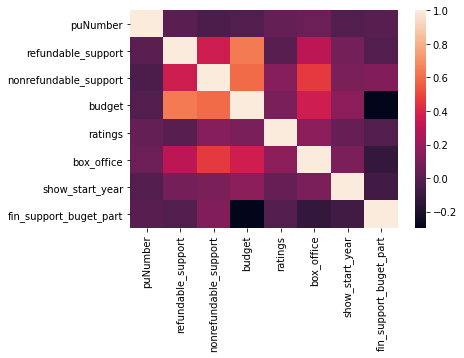

In [124]:
sb.heatmap(df_gos_podd.corr())

In [125]:
df_gos_podd.pivot_table(
    index='show_start_year',
    columns = 'type',
    values = 'title',
    aggfunc = 'count')

type,Анимационный,Документальный,Художественный
show_start_year,,,
2013,NaN,NaN,2.00
2014,1.00,NaN,14.00
2015,7.00,NaN,74.00
2016,5.00,NaN,52.00
2017,5.00,NaN,34.00
2018,7.00,NaN,46.00
2019,5.00,1.00,61.00


<AxesSubplot:xlabel='show_start_year'>

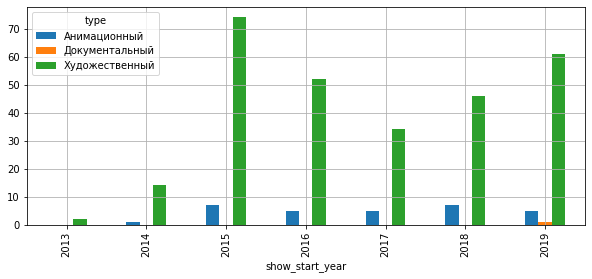

In [126]:
df_gos_podd.pivot_table(
    index='show_start_year',
    columns = 'type',
    values = 'title',
    aggfunc = 'count').plot(kind='bar', grid=True, figsize=(10,4))

Деньги выделяют в основном на художественные фильмы, анимация почти не поддерживается государством.

<AxesSubplot:>

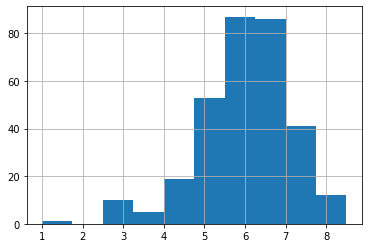

In [127]:
df_gos_podd['ratings'].hist()

In [128]:
print(f'Процент фильмов с высоким рейтингом среди фильмов с господдержкой: {df_gos_podd[df_gos_podd["ratings"]>6]["title"].count()/len(df_gos_podd):.2%}')


Процент фильмов с высоким рейтингом среди фильмов с господдержкой: 55.73%


In [129]:
print('Количество фильмов, требующих возврата вложенных средств:',df_gos_podd[df_gos_podd['refundable_support']>0]['title'].count())
print('Количество фильмов, не требующих возврата вложенных средств:',df_gos_podd[~(df_gos_podd['refundable_support']>0)]['title'].count())

Количество фильмов, требующих возврата вложенных средств: 108
Количество фильмов, не требующих возврата вложенных средств: 206


In [130]:
df_gos_podd = df_gos_podd[(df_gos_podd['budget']>0) & (df_gos_podd['box_office']>0)]

In [131]:
# Рассчитаем окупаемость, отняв из сборов бюджет.
df_gos_podd['payback'] = df_gos_podd['box_office']-df_gos_podd['budget']

In [132]:
df_gos_podd['payback'].describe()

count           285.00
mean       -6238080.23
std       319894636.24
min     -1971477243.41
25%       -75466213.50
50%       -42959950.00
75%       -10606615.66
max      2913568690.79
Name: payback, dtype: float64

In [133]:
print('Фильмов, принесших прибыль:', df_gos_podd[df_gos_podd['payback']>0]['title'].count(), 'из 314')
print()
print('Из них:')
df_gos_podd[df_gos_podd['payback']>0].groupby('age_restriction')['type'].value_counts()

Фильмов, принесших прибыль: 65 из 314

Из них:


age_restriction                         type          
«0+» - для любой зрительской аудитории  Анимационный       1
«12+» - для детей старше 12 лет         Художественный    26
«16+» - для детей старше 16 лет         Художественный    19
«18+» - запрещено для детей             Художественный     2
«6+» - для детей старше 6 лет           Художественный    10
                                        Анимационный       7
Name: type, dtype: int64

Подростки приносят больше всего прибыли.

In [134]:
df_gos_podd['fin_support_money'] = df_gos_podd['nonrefundable_support'] + df_gos_podd['refundable_support']

In [135]:
pd.pivot_table(df_gos_podd, index='show_start_year', values=['fin_support_money', 'budget', 'box_office','payback'], aggfunc = 'sum')

,box_office,budget,fin_support_money,payback
show_start_year,,,,
2013,20322385.10,255435390.00,134347945.00,-235113004.90
2014,1007160010.50,1242341926.00,523002299.00,-235181915.50
2015,4803397156.53,7052693151.00,3088541459.00,-2249295994.47
2016,4945549624.67,6978574638.00,3815635482.00,-2033025013.33
2017,10752943813.20,6790193781.00,3013971662.00,3962750032.20
2018,8070709709.74,6456185636.00,2983000000.00,1614524073.74
2019,8258542724.57,10861053768.00,3826000000.00,-2602511043.43


<AxesSubplot:xlabel='show_start_year'>

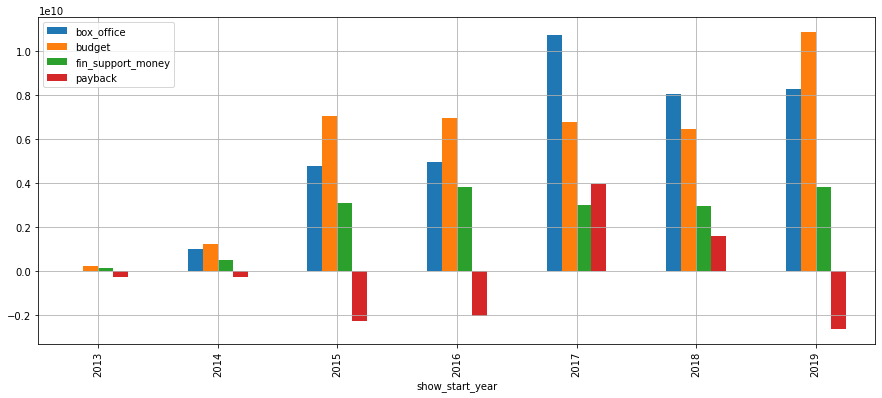

In [136]:
pd.pivot_table(df_gos_podd, index='show_start_year', values=['fin_support_money', 'budget', 'box_office','payback'], aggfunc = 'sum').plot(kind='bar', grid=True, figsize=(15,6))

Больше всего прибыли принёс 2017 год?

<AxesSubplot:xlabel='show_start_year'>

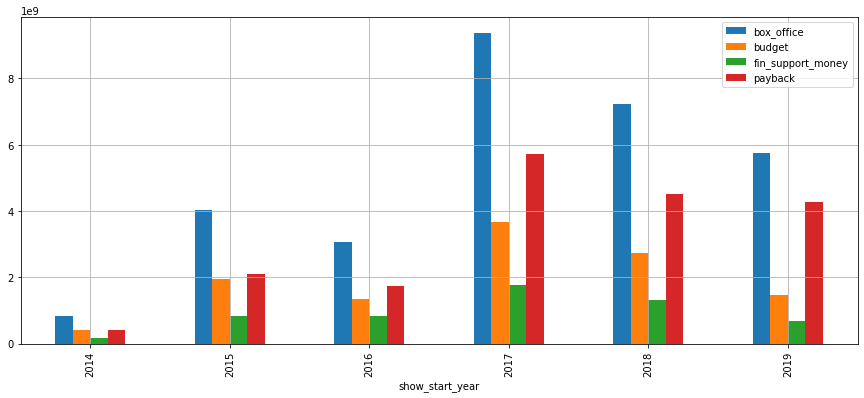

In [137]:
pd.pivot_table(df_gos_podd[df_gos_podd['payback']>0], index='show_start_year', values=['fin_support_money', 'budget', 'box_office','payback'], aggfunc = 'sum').plot(kind='bar', grid=True, figsize=(15,6))

In [138]:
pd.pivot_table(df_gos_podd[df_gos_podd['payback']>0], index='show_start_year', values=['fin_support_money', 'budget', 'box_office','payback'], aggfunc = 'sum')

,box_office,budget,fin_support_money,payback
show_start_year,,,,
2014,828060106.60,409891322.00,156000000.00,418168784.60
2015,4029362859.61,1945410957.00,828089055.00,2083951902.61
2016,3066963180.44,1338830540.00,832449482.00,1728132640.44
2017,9373918566.00,3669431746.00,1755123915.00,5704486820.00
2018,7220542418.04,2722399545.00,1318000000.00,4498142873.04
2019,5740589071.86,1456920157.00,675000000.00,4283668914.86


Да, если посмотреть только на прибыльные проекты, то 2017 год всё равно показывает лучшие результаты.

In [139]:
df_gos_podd[df_gos_podd['payback']>0]['main_genre'].value_counts()

комедия        26
драма          13
мультфильм      8
военный         3
семейный        3
ужасы           3
спорт           2
триллер         1
история         1
приключения     1
боевик          1
фантастика      1
биография       1
фэнтези         1
Name: main_genre, dtype: int64

Чаще окупаются комедии - во все времена людям нужен смех.

In [140]:
df_gos_podd[df_gos_podd['payback']>0]['main_director'].unique()

array(['Р.Давлетьяров', 'А.Войтинский', 'Максим Свешников', 'А.Цицилин',
       'Д.Месхиев', 'С.Мокрицкий', 'М.Бальчюнас', 'А.Ананикян',
       'Д.Чернов', 'Р.Гигинеишвили', 'А.Першин (псевдоним Ж.Крыжовников)',
       'Д.Дьяченко', 'К.Дружинин', 'Н.Лебедев', 'Т.Игуменцева',
       'М.Кравченко', 'Д.Шмидт', 'А.Аксененко', 'П.Руминов', 'А.Федотов',
       'Р.Каримов', 'С.Подгаевский', 'Д.Киселев', 'А.Пиманов',
       'Р.Шульман', 'Л.Марголин', 'Т.Бекмамбетов', 'О.Карас', 'А.Меликян',
       'К.Оганесян', 'К.Шипенко', 'А.Колпин', 'И.Шурховецкий',
       'М.Расходников', 'О.Зуева', 'К.Максимов', 'А.Мегердичев',
       'К.Феоктистов', 'Ф.Фархшатова',
       'А.Черномазов (псевдоним Алексей Нужный)', 'Д.Козловский',
       'К.Хабенский', 'С.Андреасян', 'К.Плетнёв', 'К.Бронзит',
       'А.Сидоров', 'М.Бальчюнас (псевдоним Марюс Вайсберг)',
       'А.Домогаров', 'А.Волгин', 'Е.Бедарев', 'Р.Прыгунов',
       'Н.Сайфуллаева', 'А.Пармас', 'В.Бедошвили'], dtype=object)

In [141]:
df_gos_podd[df_gos_podd['payback']>0]['main_director'].value_counts()

Д.Дьяченко                                 4
С.Подгаевский                              2
Д.Киселев                                  2
Д.Шмидт                                    2
К.Шипенко                                  2
С.Мокрицкий                                2
Т.Бекмамбетов                              2
Л.Марголин                                 2
Р.Гигинеишвили                             2
Н.Сайфуллаева                              1
К.Дружинин                                 1
Р.Каримов                                  1
А.Меликян                                  1
Р.Прыгунов                                 1
К.Оганесян                                 1
Р.Шульман                                  1
А.Пармас                                   1
Д.Месхиев                                  1
О.Зуева                                    1
Д.Чернов                                   1
А.Домогаров                                1
М.Бальчюнас                                1
Ф.Фархшато

In [142]:
# Самый продуктивный режиссёр

df_gos_podd[df_gos_podd['main_director']=='Д.Дьяченко']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,fin_support_buget_part,payback,fin_support_money
2767,Страна чудес,111018415,2015-10-16,Художественный,"ООО ""Ол Медиа Компани""",Россия,Д.Дьяченко,"Г.Шабанов, Р.Татаринцев, Э.Илоян",«12+» - для детей старше 12 лет,41000000.00,...,Фонд кино,6.00,"ужасы,комедия",294590750.60,2015,Д.Дьяченко,ужасы,0.63,189145204.60,66000000.00
2872,Супербобровы,111004716,2016-03-01,Художественный,"ООО ""КЕЙСТОУН ПРОДАКШН ГРУП"" по заказу ООО ""Фи...",Россия,Д.Дьяченко,"Э.Илоян, В.Шляппо, А.Троцюк, Д.Жалинский, Д.Дь...",«12+» - для детей старше 12 лет,40000000.00,...,Фонд кино,4.90,"комедия,семейный,фантастика",270538437.90,2016,Д.Дьяченко,комедия,0.43,120529864.90,65000000.00
5505,Последний богатырь,111007017,2017-10-19,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.00,...,Фонд кино,6.80,"комедия,фэнтези,приключения",1655037688.00,2017,Д.Дьяченко,комедия,0.28,1302560113.00,100000000.00
6320,СУПЕРБОБРОВЫ. НАРОДНЫЕ МСТИТЕЛИ,111020318,2018-10-20,Художественный,"ООО ""Кейстоун продакшн груп"" по заказу АО ""ВБД...",Россия,Д.Дьяченко,"Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк",«12+» - для детей старше 12 лет,40000000.00,...,Фонд кино,4.90,"комедия,семейный",184731757.62,2018,Д.Дьяченко,комедия,0.69,11968139.62,120000000.00


In [143]:
df_gos_podd[(df_gos_podd['payback']>0) & (df_gos_podd['ratings']>6)]['title'].unique()

array(['А зори здесь тихие..._', 'Призрак_.',
       'Снежная Королева 2: Перезаморозка', 'Батальонъ',
       'Битва за Севастополь', 'Смешарики. Легенда о золотом драконе',
       'Без границ', '28 Панфиловцев', 'Экипаж .', 'Завтрак у папы',
       'Иван Царевич и Серый Волк 3', 'Чемпионы: Быстрее. Выше. Сильнее',
       'Гуляй, Вася !', 'Время первых (2017)', 'Хороший Мальчик',
       'Про любовь. Только для взрослых', 'Салют-7', 'Последний богатырь',
       'Фиксики. Большой секрет', 'Легенда о Коловрате',
       'Временные трудности', 'Движение вверх',
       'О чем говорят мужчины. Продолжение', 'Я худею', 'Тренер',
       'СОБИБОР (SOBIBOR)', 'Непрощенный', 'Без меня',
       'Три богатыря и наследница престола', 'Ёлки Последние', 'Т-34',
       'Балканский рубеж', 'Домовой', 'Миллиард', 'Верность',
       'Фиксики против кработов', 'Холоп', 'Иван Царевич и Серый Волк 4'],
      dtype=object)

Вот перечень фильмов, окупившихся в прокате и с высоким рейтингом, которые получили финансирование из бюджета.

### Шаг 5. Напишите общий вывод

        Датасет чистый. Иногда в категориальных данных встречается пробел в начале значений, иногда сокращённые написания имён без точек.
        Рейтинг фильмов содержит данные двух типов - привычный десятибальный и процентный. Поскольку непонятно, что за проценты, в дальнейшем я исключаю эти строки для анализа рейтинга.
        Я выделила в отдельные столбцы год проката, главного режиссёра и основной жанр. Посчитала, какую часть бюджета составляет господдержка. Далее выяснила процент фильмов, для которых известно, сколько они заработали в прокате, для каждого года.
        Потом я рассматриваю только года с 2015 по 2019 и оказывается, что больше всего денег заработали фильмы для подростков (12+ и 16+), и только в 2019 году более успешны детские фильмы (6+).
        Далее я делаю анализ фильмов с господдержкой. Выбрасываю строки с рейтингом больше 10 (те самые проценты). Немного корректирую фамилии режиссёров(2 шт.)
        В таблице корреляции вижу связь бюджета с суммами господдержки, но мы это и так знаем, и всё, линейных зависимостей не видно больше.
        Художественных фильмов каждый год выпускается гораздо больше, чем мультиков. По крайней мере половина всех фильмов с господдержкой имеет рейтинг выше 6. Примерно для трети фильмов требуется возврат средств госфинансирования.
        Посчитав прибыльность фильмов, видим, что лишь пятая часть окупает затраты (65 из 314), и это снова фильмы "12+", "16+" и "6+". Больше всего прибыли было в 2017 году. Чаще всего окупаются фильмы комедийного жанра, следом за ними две группы - драма и мультики.